In [1]:
import yfinance as yf
import os
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
#from plotly.offline import download_plotyjs,init_notebook_mode,plot,iplot
#init_notebook_mode(connected=True)
cf.go_offline()
from plotly.subplots import make_subplots
import os
from os import listdir
from os.path import isfile,join
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.style .use('fivethirtyeight')
import numpy as np

In [2]:
PATH="C:\\Users\\nafissaad\\Tutorial\\Derek Banas Technical Analysis\\Finding the Best Investment 7\\"

In [3]:
#Get Stock File Names in a List
files=[x for x in listdir(PATH) if isfile(join(PATH,x))]
files

['.jovianrc',
 '1608716751.17922_WALTONHIL 2019-2020 Annual.pdf',
 'A.csv',
 'AAL.csv',
 'AAP.csv',
 'AAPL.csv',
 'ABBV.csv',
 'ABC.csv',
 'ABMD.csv',
 'ABT.csv',
 'ACN.csv',
 'ADBE.csv',
 'ADI.csv',
 'Untitled.ipynb',
 'Wilshire-5000-Stocks.csv']

In [4]:
tickers=[os.path.splitext(x)[0] for x in files]
tickers

['.jovianrc',
 '1608716751.17922_WALTONHIL 2019-2020 Annual',
 'A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABMD',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'Untitled',
 'Wilshire-5000-Stocks']

In [5]:
def get_stock_df_from_csv(ticker):
    try:
        df=pd.read_csv(PATH + ticker +'.csv',index_col=0)
    except FileNotFoundError:
            print('File Doesnt Exist')
    else:
        return df

In [6]:
def get_column_from_csv(file,col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print('File Doesnt Exist')
    else:
        return df[col_name]

In [7]:
#Daily_Return_to_df(df,ticker)
def add_daily_return_to_df(df,ticker):
    df['Daily_Return']=(df['Close']/df['Close'].shift(1))-1
    df.to_csv(PATH+ticker+'.csv')
    return df

In [8]:
#Get Cumulative Return
def add_cum_return_to_df(df,ticker):
    df['cum_return']=(1+df['Daily_Return']).cumprod()
    df.to_csv(PATH+ticker+'.csv')
    return df

In [9]:
#Add Daily & Cumulative Return to all Stock Data
for x in tickers:
    try:
        print('Working on :',x)
        new_df=get_stock_df_from_csv(x)
        new_df=add_daily_return_to_df(new_df,x)
        new_df=add_cum_return_to_df(new_df,x)
        new_df.to_csv(PATH + x +'.csv')
    except Exception as ex:
        print(ex)

Working on : .jovianrc
File Doesnt Exist
'NoneType' object is not subscriptable
Working on : 1608716751.17922_WALTONHIL 2019-2020 Annual
File Doesnt Exist
'NoneType' object is not subscriptable
Working on : A
Working on : AAL
Working on : AAP
Working on : AAPL
Working on : ABBV
Working on : ABC
Working on : ABMD
Working on : ABT
Working on : ACN
Working on : ADBE
Working on : ADI
Working on : Untitled
File Doesnt Exist
'NoneType' object is not subscriptable
Working on : Wilshire-5000-Stocks
'Close'


In [10]:
#Get Ichimoku Function
def get_Ichimoku(ticker):
    df=yf.download(tickers=ticker,period='1y',interval='1d')
    #Conversion
    hi_val=df['High'].rolling(window=9).max()
    low_val=df['Low'].rolling(window=9).min()
    df['Conversion']=(hi_val+low_val)/2
    #Baseline
    hi_val2=df['High'].rolling(window=26).max()
    low_val2=df['Low'].rolling(window=26).min()
    df['Conversion']=(hi_val+low_val)/2
    #Spans
    df['SpanA']=((df['Conversion']+df['Baseline'])/2).shift(26)
    hi_val3=df['High'].rolling(window=52).max()
    hi_val3=df['Low'].rolling(window=52).min()
    df['SpanB']=((hi_val3+low_val3)/2).shift(26)
    df['Lagging']=df['Close'].shit(-26)
    
    #candlestick
    plt.figure()
    width = .4
    width2 = .05

    #define up and down prices
    up = df[df.Close>=df.Open]
    down = df[df.Close<df.Open]

    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
    plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
    plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

    #plot down prices
    plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
    plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
    plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')

    #display candlestick chart
    plt.show()

In [11]:
#Get Ichimoku Function
def get_Ichimoku(ticker,Start,End):
    df=yf.download(tickers=ticker,period='1y',interval='1d')
    #Conversion
    hi_val=df['High'].rolling(window=9).max()
    low_val=df['Low'].rolling(window=9).min()
    df['Conversion']=(hi_val+low_val)/2
    #Baseline
    hi_val2=df['High'].rolling(window=26).max()
    low_val2=df['Low'].rolling(window=26).min()
    df['Baseline']=(hi_val2+low_val2)/2
    #Spans
    df['SpanA']=((df['Conversion']+df['Baseline'])/2).shift(26)
    hi_val3=df['High'].rolling(window=52).max()
    low_val3=df['Low'].rolling(window=52).min()
    df['SpanB']=((hi_val3+low_val3)/2).shift(26)
    df['Lagging']=df['Close'].shift(-26)

    #candlestick
    plt.figure(figsize=(15,10))
    df1=df.sort_index().loc[Start:End]
    width = 1
    width2 = .1

    #define up and down prices
    up = df1[df1.Close>=df1.Open]
    down = df1[df1.Close<df1.Open]

    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
    plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
    plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

    #plot down prices
    plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
    plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
    plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)
    
    plt.plot(df1.index,df1.Lagging,linewidth=1)
    
    idx=df1.index
    SpanA=np.array(df1['SpanA'])
    SpanB=np.array(df1['SpanB'])
    Conversion=np.array(df1['Conversion'])
    Baseline=np.array(df1['Baseline'])

    plt.plot(idx,SpanA,
             color='#04DE71',
            linestyle='--',
             alpha=0.5,
             linewidth=1,
             label='SpanA'
            )
    plt.plot(idx,SpanB,
             color='#00F5EA',
             linestyle='--',
             linewidth=1,
             alpha=0.5,
             label='SpanB'
            )
    
    plt.plot(idx,Conversion,
             color='green',
             linewidth=2,
             label='Conversion'
            )
    plt.plot(idx,Baseline,
             color='red',
             linestyle='-',
             linewidth=2,
             label='Baseline'
            )
    
    plt.fill_between(idx,
                     SpanA,
                     SpanB,
                     where=(SpanA>SpanB),
                     alpha=0.5,
                     color='green'
                    )
    plt.fill_between(idx,
                     SpanA,
                     SpanB,
                     where=(SpanA<SpanB),
                     alpha=0.5,
                     color='red')

    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')

    #display candlestick chart
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


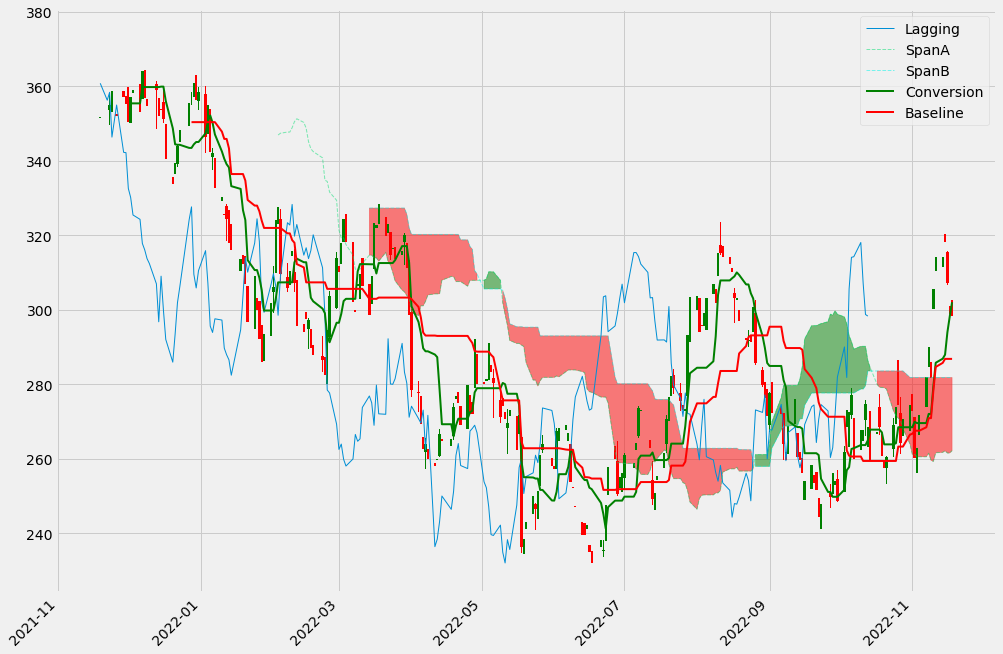

In [12]:
get_Ichimoku('ODFL','2021-11-1','2022-11-19')

In [13]:
#Conversion Line indicates Short run moving average
#Base Line indicates Long run moving average 
#Buy signal when Lagging line will keep going up above price Candles and price candles are going up above the cloud 
#Conversion line and base line possitive cross over 
#Sell signal is opposite of all of this